# 1/25th Degree Mid-Atlantic Grid

#### Generating a Mid-Atlantic Grid based on NWA25

In this example, we'll create a Lambert Conformal Conic grid off the coast of the Mid-Atlantic US from scratch using the [GridTools python library](https://github.com/ESMG/gridtools/tree/main/gridtools). Once the grid is created, we'll generate bathymetry files that match our grid resolution and size. We'll show an example on how to manually edit specific cells of the bathymetry file. Finally, we'll generate the exchange files to wrap up the requirements for MOM6 input. 

### Create the Grid

In [1]:
#!/bin/env python3
# conda: gridTools
import sys, os, logging, cartopy
from gridtools.gridutils import GridUtils
%matplotlib inline

# Set a place to write files - I created a midatlantic folder in my Downloads Directory, but you can put this wherever
wrkDir = './'
# create an INPUT directory inside of our midatlantic directory
inputDir = os.path.join(wrkDir, 'INPUT')

# Initialize a grid object
grd = GridUtils()

# Make sure we erase any previous grid, grid parameters and plot parameters.
grd.clearGrid()

# Specify the grid parameters with dictionary declarations similar ot KWARGS
# gridMode should be 2.0 for supergrid
# to read up more on the arguments, here is the function - https://github.com/ESMG/gridtools/blob/2c15d5e82a28e1d485e669bbdbd3653be0b54e5b/gridtools/gridutils.py#L2173
grd.setGridParameters({
    'projection': {
        'name': 'Mercator',
        'lon_0': 290.0,
        'lat_0': 35.0,
        'ellps': 'WGS84'
    },
    'centerX': 291.0,
    'centerY': 29.0,
    'centerUnits': 'degrees',
    'dx': 60,
    'dxUnits': 'degrees',
    'dy': 50,
    'dyUnits': 'degrees',
    'tilt': 0.0,
    'gridResolution': 0.04,
    'gridResolutionUnits': 'degrees',
    'gridMode': 2.0,
    'gridType': 'MOM6',
    'ensureEvenI': True,
    'ensureEvenJ': True,
    'tileName': 'tile1',
})

# print our grid parameters of our grid class 
grd.showGridParameters()


Current grid parameters:
          projection: {'name': 'Mercator', 'lon_0': 290.0, 'lat_0': 35.0, 'ellps': 'WGS84'}
             centerX: 291.0
             centerY: 29.0
         centerUnits: degrees
                  dx: 60
             dxUnits: degrees
                  dy: 50
             dyUnits: degrees
                tilt: 0.0
      gridResolution: 0.04
 gridResolutionUnits: degrees
            gridMode: 2.0
            gridType: MOM6
         ensureEvenI: True
         ensureEvenJ: True
            tileName: tile1


In [2]:
# officially make the grid based on our parameters
grd.makeGrid()

# Define plot parameters so we can see what the grid looks like
grd.setPlotParameters(
    {
        'figsize': (8,8),
        'projection': {
            'name': 'Mercator',
            'lat_0': 35.0,
            'lon_0': 292.0
        },
        'extent': [-100.0 ,-35.0, 3.0, 60.0],
        'iLinewidth': 0.1,
        'jLinewidth': 0.1,
        'showGridCells': True,
        'title': "Mercator: 0.5 deg x 0.5 deg",
        'satelliteHeight': 35785831.0,
        'transform': cartopy.crs.PlateCarree(),
        'iColor': 'k',
        'jColor': 'k'
    }
)

# display the plotting parameters for our grid
grd.showPlotParameters()


Generating regular lat-lon grid centered at (291.00 29.00).
   Generated regular lat-lon grid between latitudes 4.00 54.00
   Number of js=2501
Current plot parameters:
             figsize: (8, 8)
                 dpi: 100.0
              extent: [-100.0, -35.0, 3.0, 60.0]
           extentCRS: +proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=0.0 +to_meter=111319.4907932736 +vto_meter=1 +no_defs +type=crs
          projection: {'name': 'Mercator', 'lat_0': 35.0, 'lon_0': 292.0}
            showGrid: True
       showGridCells: True
       showSupergrid: False
          iLinewidth: 0.1
          jLinewidth: 0.1
               title: Mercator: 0.5 deg x 0.5 deg
     satelliteHeight: 35785831.0
           transform: +proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=0.0 +to_meter=111319.4907932736 +vto_meter=1 +no_defs +type=crs
              iColor: k
              jColor: k


### Plot our Grid

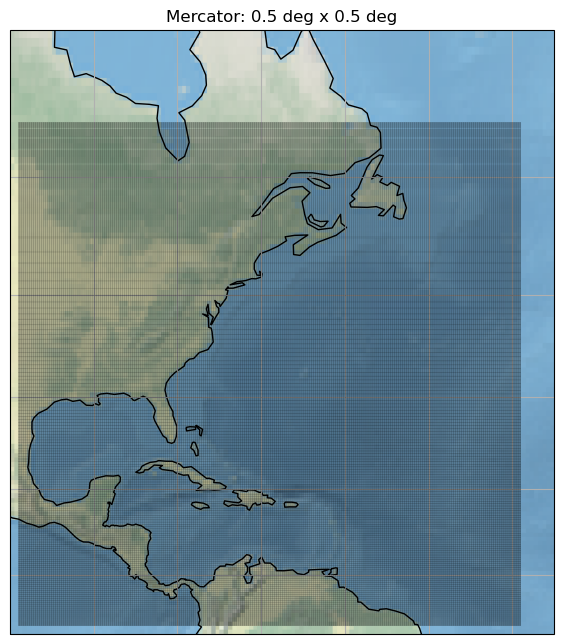

In [36]:

# When we call plotGrid() we have two python objects returned
# Figure object - you have control whether to show the
#   figure or save the contents to an output file
# Axes object - you can further fine tune plot parameters,
#   titles, axis, etc prior to the final plotting of the figure.
#   Some items may be configured via the figure object.

(figure, axes) = grd.plotGrid()
figure

In [3]:
# our grid is an xarray object - let's print it
grd.grid

<xarray.Dataset>
Dimensions:   (nx: 3000, nxp: 3001, ny: 2500, nyp: 2501)
Dimensions without coordinates: nx, nxp, ny, nyp
Data variables:
    x         (nyp, nxp) float64 -99.0 -98.98 -98.96 ... -39.04 -39.02 -39.0
    y         (nyp, nxp) float64 4.0 4.0 4.0 4.0 4.0 ... 54.0 54.0 54.0 54.0
    tile      <U5 'tile1'
    dx        (nyp, nx) float64 2.221e+03 2.221e+03 ... 1.309e+03 1.309e+03
    dy        (ny, nxp) float64 2.226e+03 2.226e+03 ... 2.226e+03 2.226e+03
    angle_dx  (nyp, nxp) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    area      (ny, nx) float64 4.945e+06 4.945e+06 ... 2.914e+06 2.914e+06
Attributes:
    grid_version:      0.2
    code_version:      GridTools: 0.3.0
    history:           2023-01-16 16:00:54: created grid with GridTools library
    projection:        Mercator
    grid_centerX:      291.0
    grid_centerY:      29.0
    grid_centerUnits:  degrees
    grid_dx:           60
    grid_dxUnits:      degrees
    grid_dy:           50
    grid_dyUnits:      degrees
    grid_tilt:         0.0
    software_version:  Cython 0.29.32; IPython 8.4.0; appnope 0.1.3; asttoken...
    proj:              +ellps=WGS84 +proj=merc +lon_0=290.0 +x_0=0.0 +y_0=0.0...

In [4]:
# Save the new grid to a netCDF file
grd.saveGrid(filename=os.path.join(wrkDir, "ocean_hgrid.nc"))

Successfully wrote netCDF file to ./ocean_hgrid.nc


## Generate Bathymetry & Roughness

Now that our grid is created, we need to create a matching variables that contain information for each grid cell. Namely, we're after the topographic depth of the cell, the ocean floor roughness of the grid cell, and whether the grid cell is geolocated over ocean or land. Note that computing bathymetric roughness may take a few minutes. Note here that we are also going to use the `applyExistingLandmask` function to set any ocean mask points with a depth shallower than 0.0 meters will be set to 0.0 meters. To generate these variables we'll use the BathyUtils library located here - https://github.com/ESMG/gridtools/blob/main/gridtools/bathyutils.py

In [75]:
from gridtools.datasource import DataSource
import pdb
import xarray as xr

# define GEBCO file path
bathPath = '/Users/james/Documents/Rutgers/data/GEBCO_2020/GEBCO_2020.nc'
# External data sources are required
# This creates an empty data source catalog
ds = DataSource()

# Connect the catalog to the grid object
grd.useDataSource(ds)

# For variableMap, matching variable values will be renamed to the
# variable key.  For evalMap, variables in the expression need
# to be in brackets.  If the key is new, a new field will be
# created with the given expression.
ds.addDataSource({
    'GEBCO_2020': {
            'url' : 'file:' + bathPath,
            'variableMap' : {
                    'lat': 'lat',
                    'lon': 'lon',
                    'depth' : 'elevation'
                },
            'evalMap': {
                    'depth' : '-[depth]'
                }
        }
})

# define our bathyGrid output filename
bathyGridFilename = os.path.join(wrkDir, 'ocean_topog.nc')

if os.path.isfile(bathyGridFilename):
    bathyGrids = xr.open_dataset(bathyGridFilename)
else:
    # Data sources cannot be in chunked mode for use in this routine - https://github.com/ESMG/gridtools/blob/2c15d5e82a28e1d485e669bbdbd3653be0b54e5b/gridtools/bathyutils.py#L583
    bathyGrids = grd.computeBathymetricRoughness('ds:GEBCO_2020',
            maxMb=99, superGrid=False, useClipping=False,
            FixByOverlapQHGridShift=True,
            auxVariables=['hStd', 'hMin', 'hMax', 'depth'],
    )

    # This is needed to really convert the elevation field to depth
    # The 'depth' field has to be requested as an auxVariables
    grd.applyEvalMap('ds:GEBCO_2020', bathyGrids)
    
    # Write ocean_mask.nc and land_mask.nc based on existing field
    grd.writeOceanmask(bathyGrids, 'depth', 'mask',
            os.path.join(wrkDir, 'ocean_mask.nc'),
            MASKING_DEPTH=0.0)
    grd.writeLandmask(bathyGrids, 'depth', 'mask',
            os.path.join(wrkDir, 'land_mask.nc'),
            MASKING_DEPTH=0.0)

    
    # Argument notes:
    #  * Any ocean mask points shallower than a depth of 1000.0 meters will be set to 1000.0 meters
    #  * Any land mask points that become ocean will be set to a depth of 100.0 meters
    #  * Any ocean points that become land will have a depth of 0.0 meters
    
    bathyGrids['newDepth'] = grd.applyExistingLandmask(bathyGrids, 'depth',
            os.path.join(wrkDir, 'land_mask.nc'), 'mask',
            MASKING_DEPTH=0.0, MINIMUM_DEPTH=0.0, MAXIMUM_DEPTH=-99999.0)
    bathyGrids['newDepth'].attrs['units'] = 'meters'
    bathyGrids['newDepth'].attrs['standard_name'] = 'topographic depth at Arakawa C h-points'

    # Write grid variables out to a file as netCDF
    bathyGrids.to_netcdf(os.path.join(wrkDir, 'ocean_topog.nc'),
            encoding=grd.removeFillValueAttributes(data=bathyGrids))



### Plot Bathymetry Variables

We just saved our bathymetry grid variables to a netCDF file. Let's open this up and plot our variables. 

In [6]:
# Display our ocean_topog_midatlanticLCC.nc file 
topo = xr.open_dataset(wrkDir + '/ocean_topog.nc')

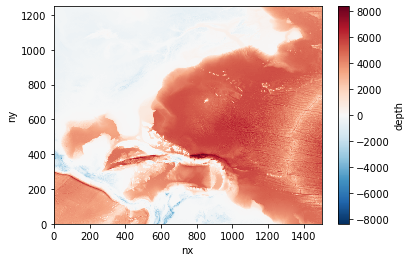

In [7]:
# use default xarray plotting routines for new depth
topo.depth.plot()

## Ocean Mask / Ocean Fraction

When we used the `computeBathymetricRoughness()` above, we created an ocean mask (aka ocean fraction) variable. We saved this variable to it's own netCDF file and called it `ocean_mask_midatlanticLCC.nc`. Let's take a look at this file

In [12]:
oMask = xr.open_dataset(wrkDir + "/ocean_mask.nc")

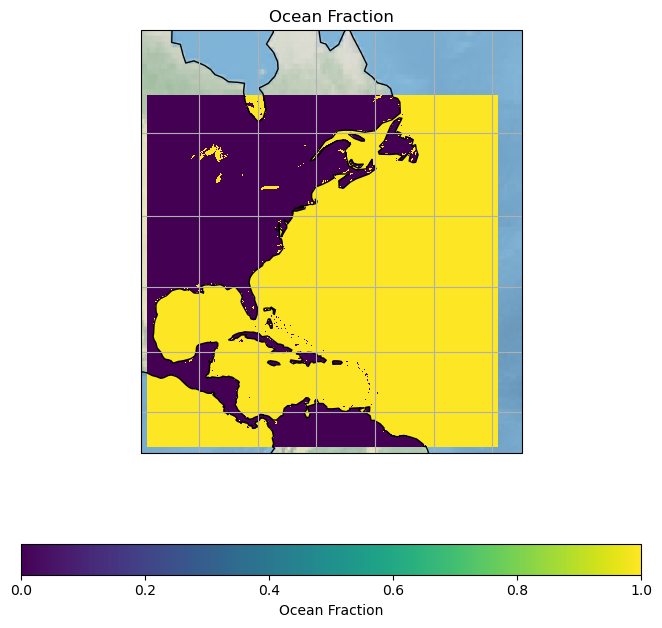

In [13]:
# Show mask variable
(figure, axes) = grd.plotGrid(
    showModelGrid=False,
    plotVariables={
        'Ocean Fraction': {
            'values': oMask['mask'],
            'title': 'Ocean Fraction',
            'cbar_kwargs': {
                'orientation': 'horizontal',
            }
        }
    },
)
figure

## Editing Ocean Mask 

Edit out the Hudson Bay

In [34]:
import xarray as xr
wrkDir = '/Users/james/Documents/Github/nwa25/misc/gridgen/'
topo = xr.open_dataset(wrkDir + '/ocean_topog.nc')

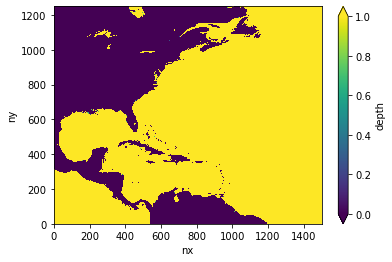

In [35]:
topo.depth.plot(vmin=0,vmax=1)

In [60]:
# Mask Out Hudson Bay
hudson = topo
for y in range(750,len(hudson.ny)):
    for x in range(100,600):
        if y > 950 and x < 600:
            hudson.depth[y,x] = 0.0

# Mask Out Lakes near bay of bundy
for y in range(1000,len(hudson.ny)):
    for x in range(500,700):
        if y > 1000 and x < 800:
            hudson.depth[y,x] = 0.0
            
# mask out lake okeechobee
for y in range(550,600):
    for x in range(450,460):
        hudson.depth[y,x] = 0.0

# mask out lago de maracaibo
for y in range(120,170):
    for x in range(670,720):
        hudson.depth[y,x] = 0.0
        
# mask out pacific 1
for y in range(0,330):
    for x in range(0,230):
        hudson.depth[y,x] = 0.0

# mask out pacific 2
for y in range(0,250):
    for x in range(230,370):
        hudson.depth[y,x] = 0.0
        
# mask out pacific 3
for y in range(0,130):
    for x in range(370,410):
        hudson.depth[y,x] = 0.0
        
# mask out pacific 3
for y in range(0,130):
    for x in range(370,410):
        hudson.depth[y,x] = 1.0
        
# mask out pacific 4
for y in range(0,110):
    for x in range(410,550):
        hudson.depth[y,x] = 1.0
        
# mask out pacific 4
for y in range(110,130):
    for x in range(470,530):
        hudson.depth[y,x] = 1.0

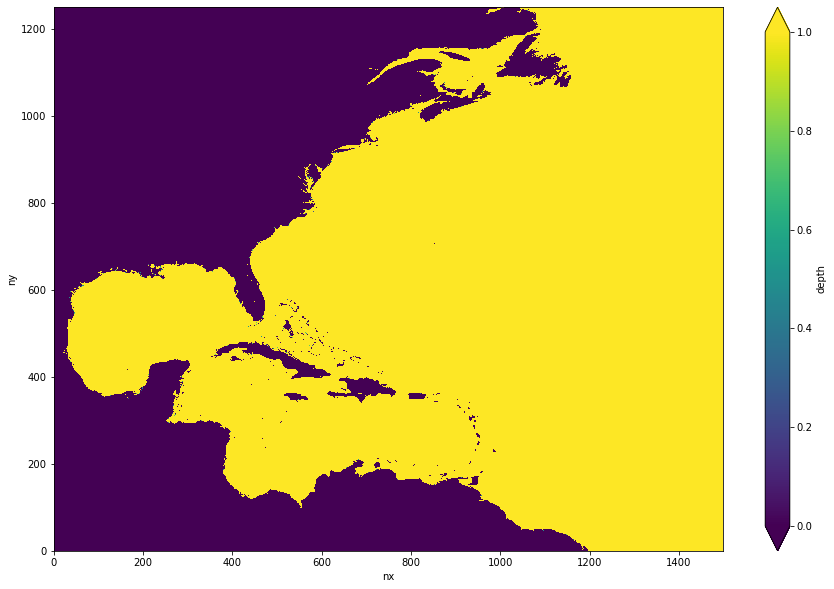

In [61]:
hudson.depth.plot(vmin=0,vmax=1, size=10)

# Edit Land Mask Cells

In [63]:
land_mask = xr.open_dataset(wrkDir+ "land_mask.nc")

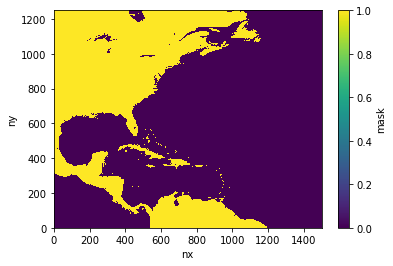

In [64]:
land_mask.mask.plot()

In [65]:
# Mask Out Hudson Bay
hudson_land = land_mask
for y in range(750,len(hudson_land.ny)):
    for x in range(100,600):
        if y > 950 and x < 600:
            hudson_land.mask[y,x] = 1.0

# Mask Out Lakes near bay of bundy
for y in range(1000,len(hudson_land.ny)):
    for x in range(500,700):
        if y > 1000 and x < 800:
            hudson_land.mask[y,x] = 1.0
            
# mask out lake okeechobee
for y in range(550,600):
    for x in range(450,460):
        hudson_land.mask[y,x] = 1.0

# mask out lago de maracaibo
for y in range(120,170):
    for x in range(670,720):
        hudson_land.mask[y,x] = 1.0
        
# mask out pacific 1
for y in range(0,330):
    for x in range(0,230):
        hudson_land.mask[y,x] = 1.0

# mask out pacific 2
for y in range(0,250):
    for x in range(230,370):
        hudson_land.mask[y,x] = 1.0
        
# mask out pacific 3
for y in range(0,130):
    for x in range(370,410):
        hudson_land.mask[y,x] = 1.0
        
# mask out pacific 4
for y in range(0,110):
    for x in range(410,550):
        hudson_land.mask[y,x] = 1.0
        
# mask out pacific 4
for y in range(110,130):
    for x in range(470,530):
        hudson_land.mask[y,x] = 1.0

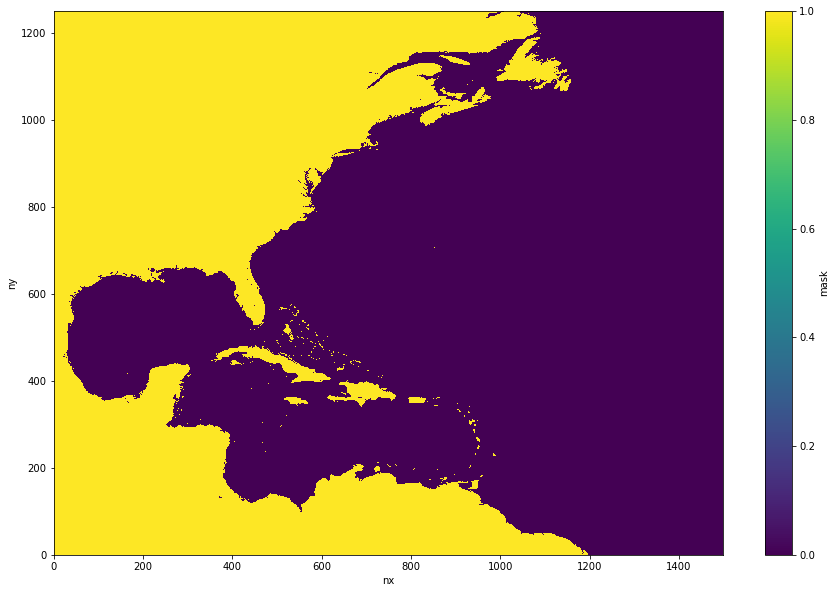

In [66]:
hudson_land.mask.plot(size=10)

# Edit Ocean Mask Cells

In [69]:
ocean_mask = xr.open_dataset(wrkDir+ "ocean_mask.nc")

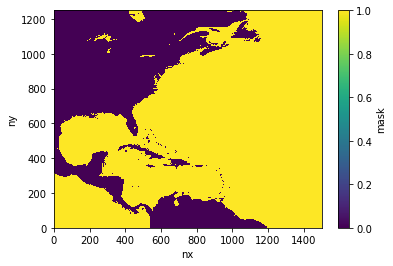

In [70]:
ocean_mask.mask.plot()

In [71]:
# Mask Out Hudson Bay
hudson_ocean = ocean_mask
for y in range(750,len(hudson_ocean.ny)):
    for x in range(100,600):
        if y > 950 and x < 600:
            hudson_ocean.mask[y,x] = 0.0

# Mask Out Lakes near bay of bundy
for y in range(1000,len(hudson_ocean.ny)):
    for x in range(500,700):
        if y > 1000 and x < 800:
            hudson_ocean.mask[y,x] = 0.0
            
# mask out lake okeechobee
for y in range(550,600):
    for x in range(450,460):
        hudson_ocean.mask[y,x] = 0.0

# mask out lago de maracaibo
for y in range(120,170):
    for x in range(670,720):
        hudson_ocean.mask[y,x] = 0.0
        
# mask out pacific 1
for y in range(0,330):
    for x in range(0,230):
        hudson_ocean.mask[y,x] = 0.0

# mask out pacific 2
for y in range(0,250):
    for x in range(230,370):
        hudson_ocean.mask[y,x] = 0.0
        
# mask out pacific 3
for y in range(0,130):
    for x in range(370,410):
        hudson_ocean.mask[y,x] = 0.0
        
# mask out pacific 4
for y in range(0,110):
    for x in range(410,550):
        hudson_ocean.mask[y,x] = 0.0
        
# mask out pacific 4
for y in range(110,130):
    for x in range(470,530):
        hudson_ocean.mask[y,x] = 0.0

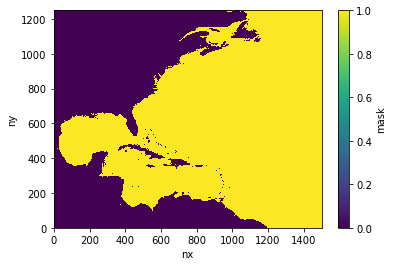

In [72]:
hudson_ocean.mask.plot()

In [73]:
inputDir = "/Users/james/Documents/Rutgers/gridgen/gt_nwa25_grid/"
hudson.to_netcdf(inputDir + "ocean_topog.nc", mode='w', format='NETCDF3_64BIT')
hudson_land.to_netcdf(inputDir + "land_mask.nc", mode='w', format='NETCDF3_64BIT')
hudson_ocean.to_netcdf(inputDir + "ocean_mask.nc", mode='w', format='NETCDF3_64BIT')

## Generate Mosaic Files for MOM6

In [74]:
from gridtools.gridutils import GridUtils
import sys, os, logging, cartopy

inputDir = "/Users/james/Documents/Rutgers/gridgen/gt_nwa25_grid/"

# Initialize a grid object
grd = GridUtils()
grd.openGrid(f"{inputDir}ocean_hgrid.nc", gridType='MOM6')
grd.readGrid()

# Write out FMS related support files
grd.makeSoloMosaic(
    topographyGrid=hudson['depth'],
    writeLandmask=True,
    writeOceanmask=True,
    inputDirectory=inputDir,
    overwrite=True,
)
grd.saveGrid(filename=os.path.join(inputDir, "ocean_hgrid_final.nc"))



Successfully wrote netCDF file to /Users/james/Documents/Rutgers/gridgen/gt_nwa25_grid/ocean_hgrid_final.nc


## Change Mask Dtype and Output Everything as NETCDF3 Classic

In [1]:
import xarray as xr

inputDir = '/Users/james/Documents/Rutgers/gridInfo/gt_nwa25_grid/'

In [18]:


ocean_mask = xr.open_dataset(inputDir + "ocean_mask.nc")
ocean_mask["mask"] = ocean_mask.mask.astype('double')
ocean_mask.to_netcdf(inputDir + "/netcdf3/ocean_mask.nc", mode='w', format='NETCDF3_CLASSIC')

land_mask = xr.open_dataset(inputDir + "land_mask.nc")
land_mask["mask"] = land_mask.mask.astype('double')
land_mask.to_netcdf(inputDir + "/netcdf3/land_mask.nc", mode='w', format='NETCDF3_CLASSIC')


In [13]:
import xarray as xr
from os import listdir
from os.path import isfile, join
myPath = inputDir
fileList = [f for f in listdir(myPath) if isfile(join(myPath, f))]

In [14]:
fileList.remove('ocean_mask.nc')
fileList.remove('land_mask.nc')
fileList

['vgrid_75_2m.nc',
 '.DS_Store',
 'land_mosaic_tile1Xocean_mosaic_tile1.nc',
 'mosaic.nc',
 'atmos_mosaic_tile1Xocean_mosaic_tile1.nc',
 'atmos_mosaic_tile1Xland_mosaic_tile1.nc',
 'ocean_mosaic.nc',
 'ocean_hgrid.nc',
 'ocean_topog.nc',
 'gt_nwa25.zip']

In [15]:
fileList.remove('vgrid_75_2m.nc')
fileList.remove('ocean_hgrid.nc')

In [16]:
fileList

['.DS_Store',
 'land_mosaic_tile1Xocean_mosaic_tile1.nc',
 'mosaic.nc',
 'atmos_mosaic_tile1Xocean_mosaic_tile1.nc',
 'atmos_mosaic_tile1Xland_mosaic_tile1.nc',
 'ocean_mosaic.nc',
 'ocean_topog.nc',
 'gt_nwa25.zip']

In [17]:
for f in fileList:
    if f.endswith('.nc'):
        print(f)
        tem = xr.open_dataset(myPath + f)
        tem.to_netcdf(path=str(myPath + '/netcdf3/' + f),mode='w',format='NETCDF3_CLASSIC')

land_mosaic_tile1Xocean_mosaic_tile1.nc
mosaic.nc
atmos_mosaic_tile1Xocean_mosaic_tile1.nc
atmos_mosaic_tile1Xland_mosaic_tile1.nc
ocean_mosaic.nc
ocean_topog.nc
